<a href="https://colab.research.google.com/github/Anamika-sasankan/assignment-on-pandas/blob/main/Exit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# 1. Load the Dataset
df=pd.read_csv('/content/customer_churn.csv')

In [47]:
# 2. View Data
# View the first few rows
print(df.head())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No     1.0           No   
1  5575-GNVDE    Male            0.0      No         No    34.0          Yes   
2  3668-QPYBK    Male            0.0      No         No     2.0          Yes   
3  7795-CFOCW    Male            0.0      No         No    45.0           No   
4  9237-HQITU  Female            0.0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [48]:
# View data types and missing values
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [49]:
# View summary statistics
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7036.000000  7030.000000     7027.000000
mean        0.162024    32.367568       64.757855
std         0.368499    24.560644       30.091845
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [50]:
#3.Check for Missing Values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64


In [51]:
#4. Handle Missing Values



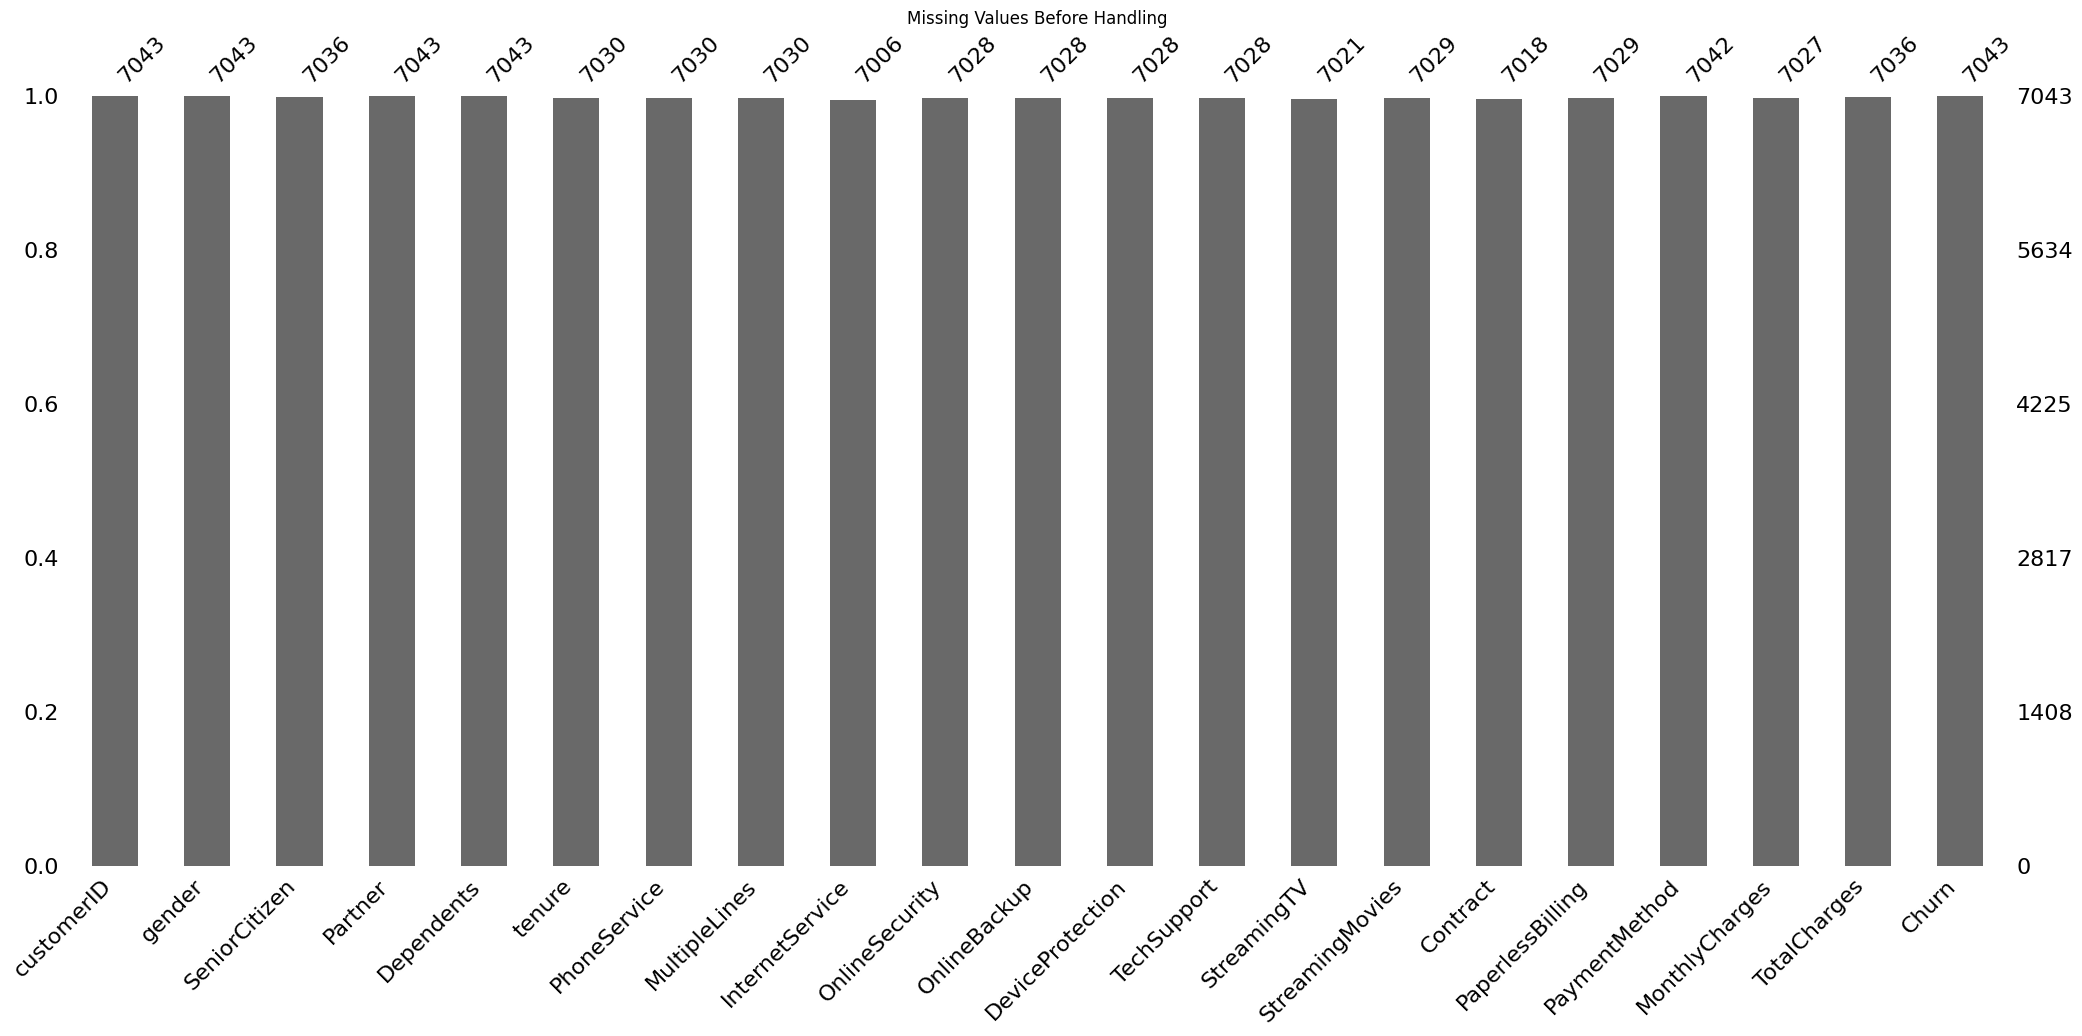

In [52]:
import missingno as msno

# Before handling missing values
plt.figure(figsize=(10, 6))
msno.bar(df)
plt.title('Missing Values Before Handling')
plt.show()



In [53]:
def handle_missing_values(df):
    for column in df.columns:
        if df[column].isnull().any():
            if pd.api.types.is_numeric_dtype(df[column]):
                df[column] = df[column].fillna(df[column].mean())
            else:
                df[column] = df[column].fillna(df[column].mode()[0])
    return df

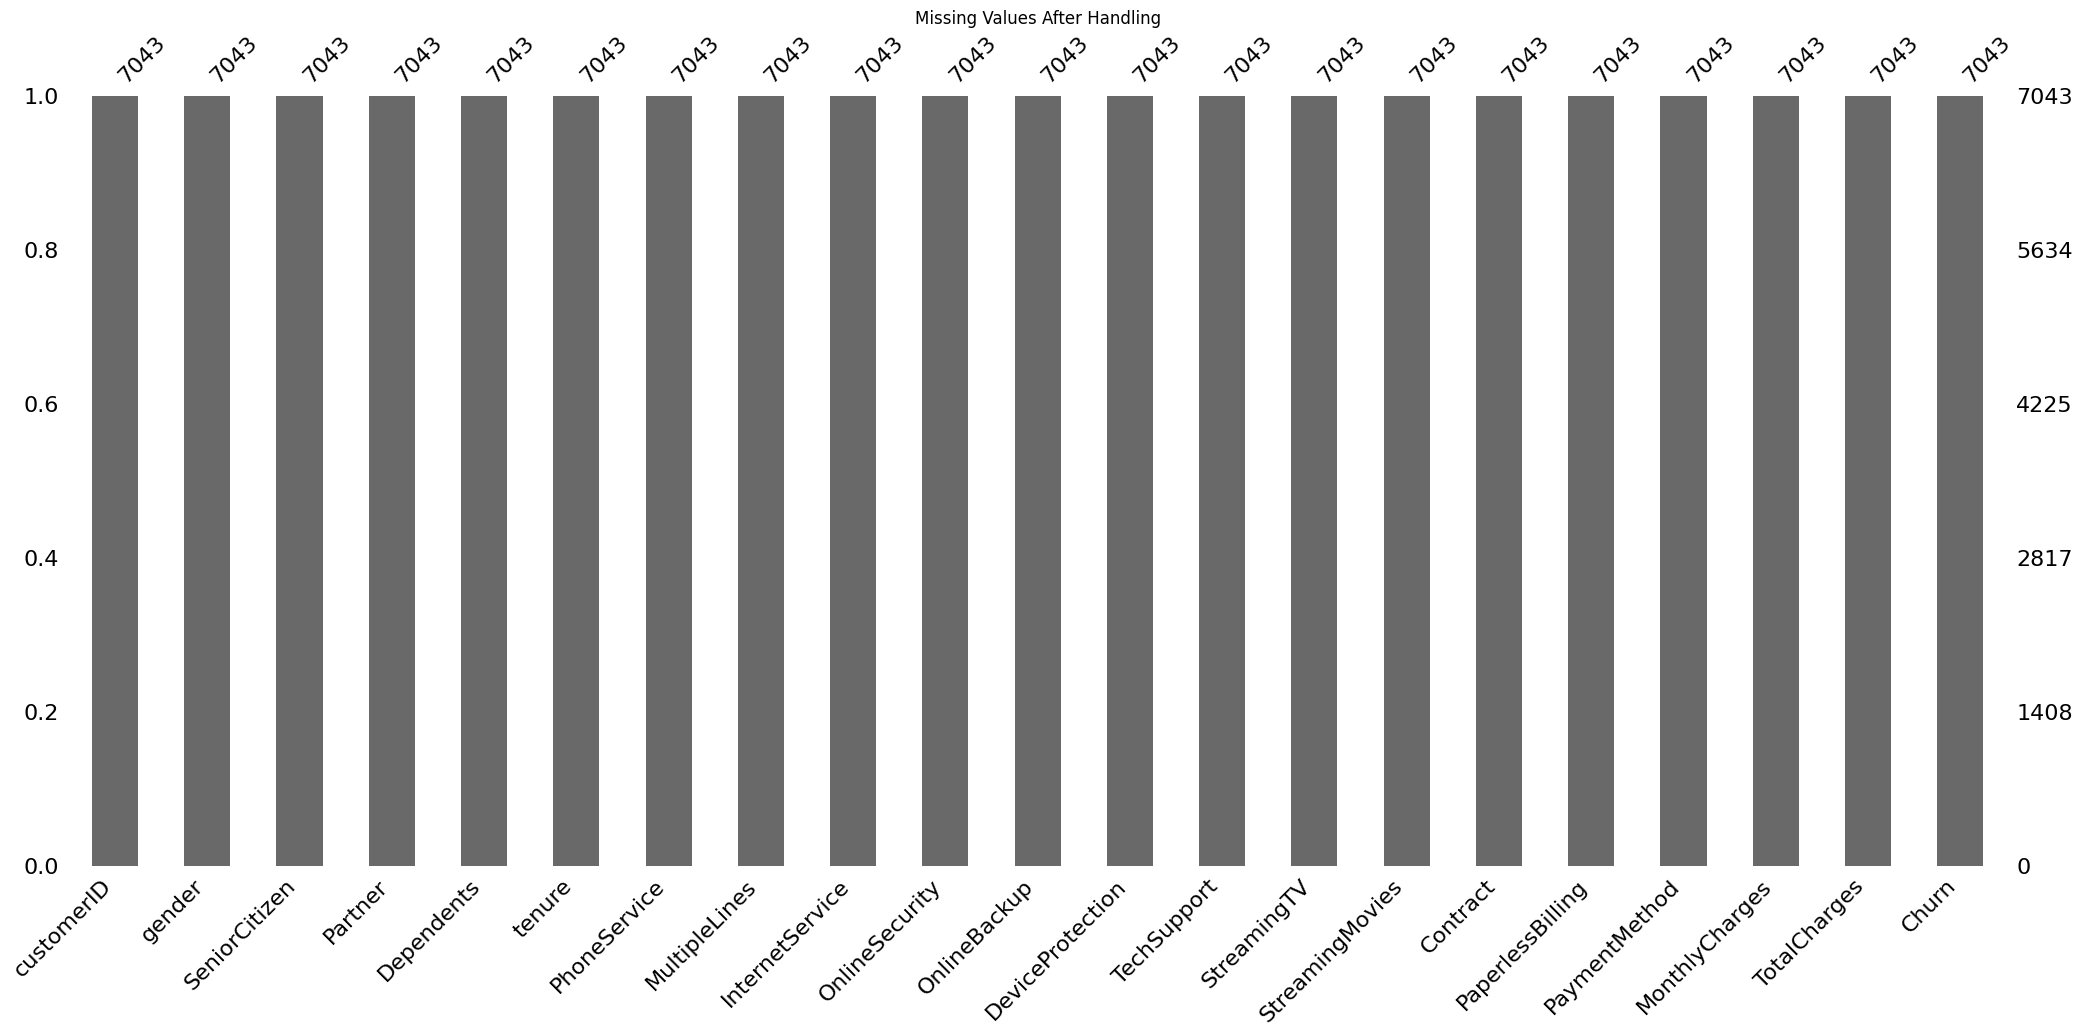

In [54]:
# Handle missing values
df = handle_missing_values(df)

# After handling missing values
plt.figure(figsize=(10, 6))
msno.bar(df)
plt.title('Missing Values After Handling')
plt.show()

In [55]:
# Verify that there are no more missing values
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [56]:
# Check data types
print(df.dtypes)



customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [57]:
# Convert categorical variables into category type
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [58]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [59]:
# Check data types after conversion
print(df.dtypes)

customerID                                object
SeniorCitizen                            float64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                              object
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

In [60]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [61]:
print(df['TotalCharges'].dtype)

float64


In [62]:
# Drop customerID column
df = df.drop('customerID', axis=1)


In [63]:
print(df.dtypes)

SeniorCitizen                            float64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter

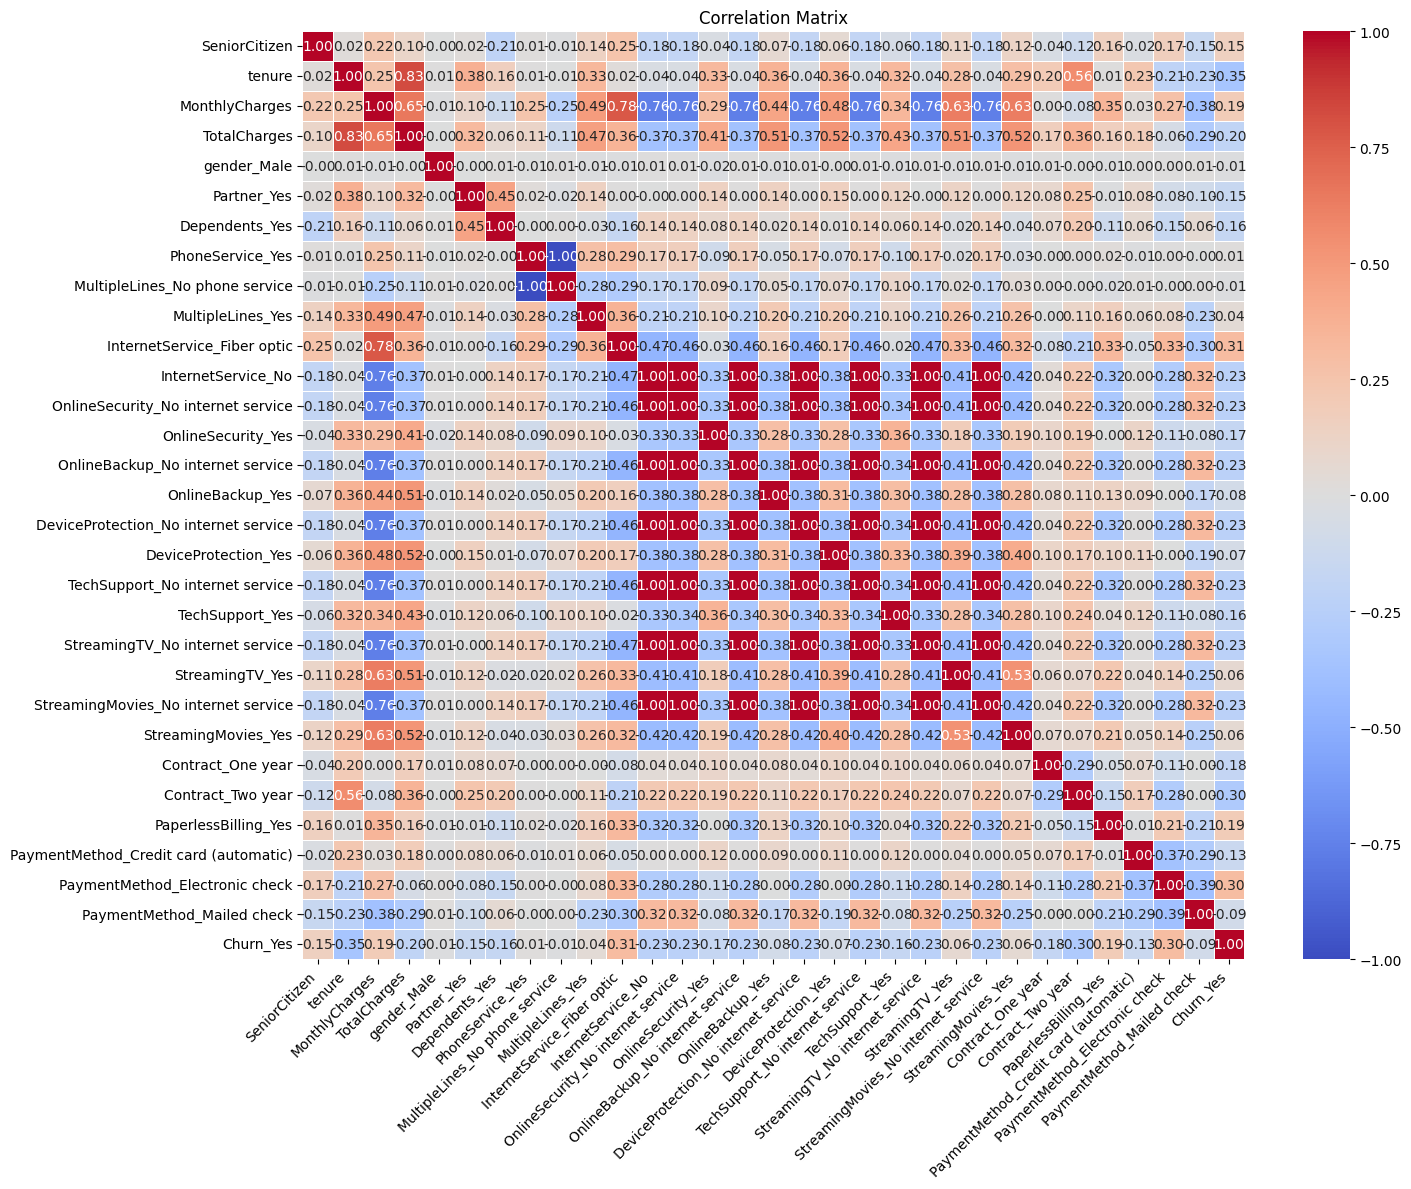

In [64]:
# Correlation analysis
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

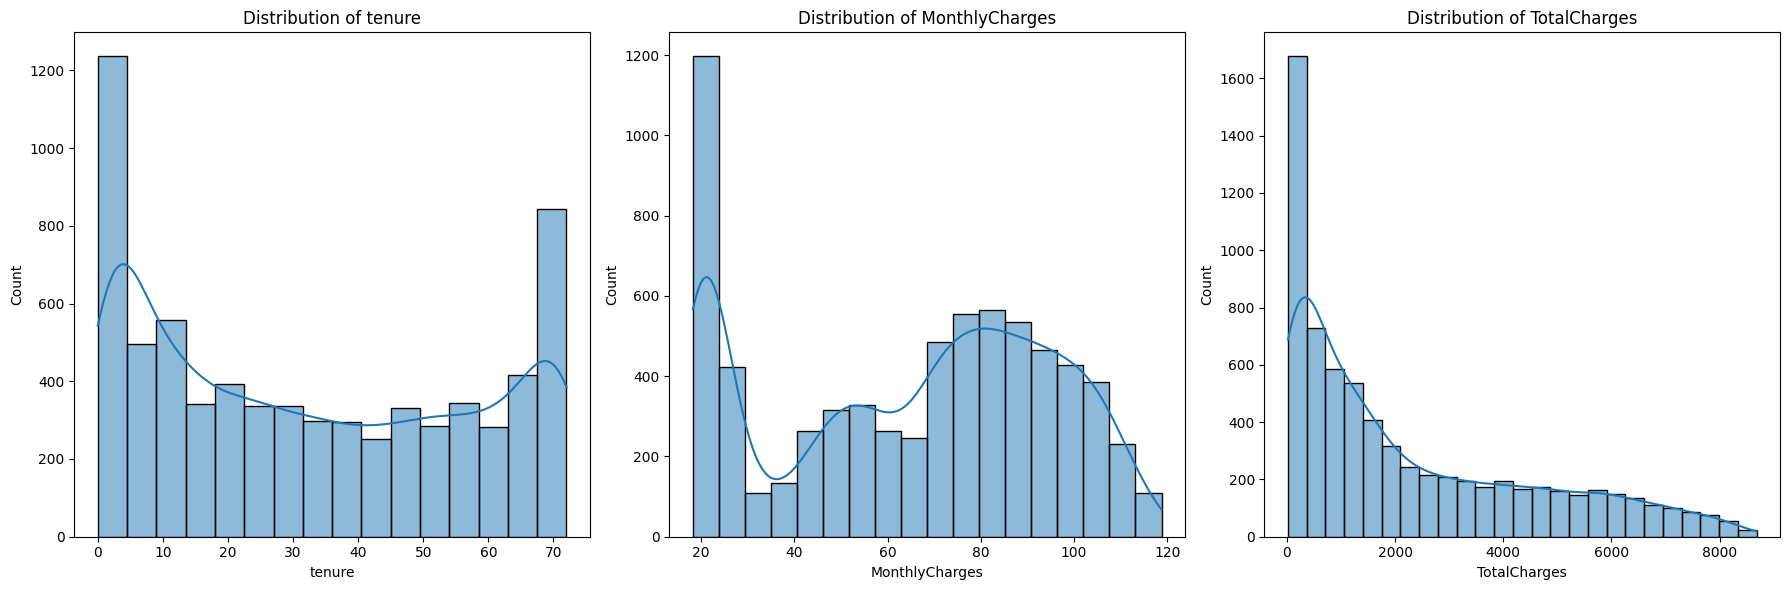

In [65]:
# Distribution analysis
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

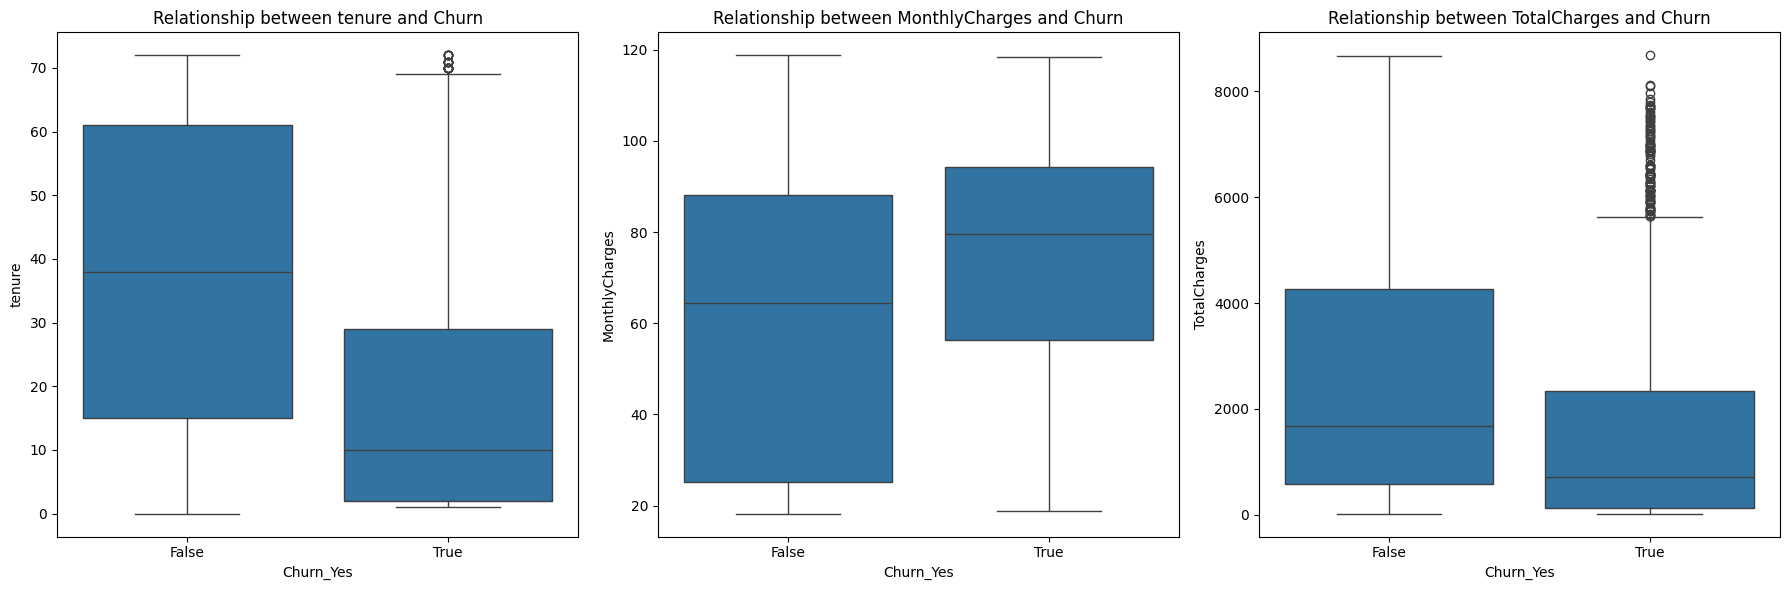

In [66]:
# Relationship with target variable
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(numerical_cols):
    # Use 'Churn_Yes' instead of 'Churn' for the x-axis
    sns.boxplot(x='Churn_Yes', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and Churn')

plt.tight_layout()
plt.show()

In [67]:

#Modeling

# Split data into features (X) and target (y)
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

In [68]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [70]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [71]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7913413768630234
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.91      0.87      1036
        True       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[944  92]
 [202 171]]


In [73]:
# Impute NaN values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [74]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(5, 15)),
    'min_samples_split': randint(2, 10)
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions, cv=5, n_iter=10, random_state=42)
random_search.fit(X_resampled, y_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b99bfd626d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b99c80e2010>},
                   random_state=42)

In [78]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Best Parameters: {'max_depth': 14, 'min_samples_split': 9, 'n_estimators': 166}
Best Score: 0.8441444459039363


In [80]:

#Evaluate the Best Model

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8019872249822569
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.88      0.87      1036
        True       0.64      0.59      0.61       373

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Confusion Matrix:
[[910 126]
 [153 220]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [84]:
#Model Deployment

import joblib

# Save the model
joblib.dump(best_model, 'churn_model.joblib')

# Load the model
loaded_model = joblib.load('churn_model.joblib')

# Create a prediction function
def predict_churn(new_data):
    return loaded_model.predict(new_data)



